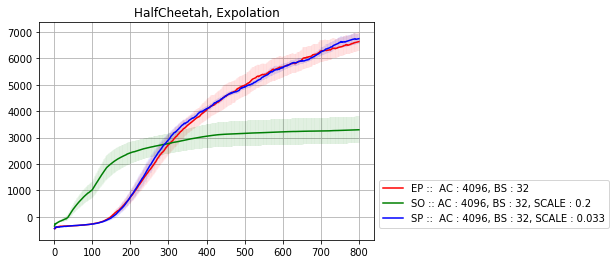

################################################

GRAPH1 : EP ::  AC : 4096, BS : 32
    MAX : 6637.426, EPISODE : 799, STD : 597.532
    MAX1 :: 5718.26, MAX2 :: 7439.124, MAX3 :: 6759.148

GRAPH2 : SO :: AC : 4096, BS : 32, SCALE : 0.2
    MAX : 3296.61, EPISODE : 800, STD : 839.856
    MAX1 :: 1895.468, MAX2 :: 4268.75, MAX3 :: 3726.275

GRAPH3 : SP ::  AC : 4096, BS : 32, SCALE : 0.033
    MAX : 6747.999, EPISODE : 800, STD : 269.207
    MAX1 :: 6602.478, MAX2 :: 7331.884, MAX3 :: 6348.758

################################################


In [1]:
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


##################################################################################################

#EP1 = ['HalfCheetah_E(4)_(16,1,4,4,1,0.0001)', 'EP :: BS : 16']
EP2 = ['HalfCheetah_E(4)_(32,1,4,4,1,0.0001)', 'EP ::  AC : 4096, BS : 32']
#EP3 = ['HalfCheetah_E(4)_(64,1,4,4,,1,0.0001)', 'EP :: BS : 64']

EP4 = ['HalfCheetah_E(4)_(32,1,4,4,1,0.0005)', 'EP :: BS : 32, LA : 0.0005']
EP5 = ['HalfCheetah_E(4)_(32,1,4,4,1,0.00005)', 'EP :: BS : 32, LA : 0.00005']

EP6 = ['HalfCheetah_E(3)_(32,1,4,4,1,0.0001)', 'EP :: BS : 32, AC : 729']
EP7 = ['HalfCheetah_E(5)_(32,1,4,4,1,0.0001)', 'EP :: BS : 32, AC : 15625']

##################################################################################################

SO4 = ['HalfCheetah_S(4)_(32,1,4,4,0.2,1,0.0001)', 'SO :: AC : 4096, BS : 32, SCALE : 0.2']
SO5 = ['HalfCheetah_S(4)_(32,1,4,4,0.1,1,0.0001)', 'SO :: BS : 32, SCALE : 0.1']
SO6 = ['HalfCheetah_S(4)_(32,1,4,4,0.05,1,0.0001)', 'SO :: BS : 32, SCALE : 0.05']

##################################################################################################

SP4 = ['HalfCheetah_SP(4)_(32,1,4,4,0.1,1,0.0001)', 'SP :: BS : 32, SCALE : 0.1']
SP5 = ['HalfCheetah_SP(4)_(32,1,4,4,0.05,1,0.0001)', 'SP :: BS : 32, SCALE : 0.05']
SP6 = ['HalfCheetah_SP(4)_(32,1,4,4,0.01,1,0.0001)', 'SP :: BS : 32, SCALE : 0.01']

SP10 = ['HalfCheetah_SP(4)_(32,1,4,4,0.03,1,0.0001)', 'SP ::  AC : 4096, BS : 32, SCALE : 0.033']

##################################################################################################

iteration = 3

#file_name_list = [EP2, EP4, EP5]
#file_name_list = [EP2, EP6, EP7]
file_name_list = [EP2, SO4, SP10]

#file_name_list = [EP2, EP6, EP7]
#file_name_list = [EP2, SP4, SP5, SP6, SP10]
#file_name_list = [EP2, SO4, SO5, SO6]

#file_name_list = [SO1, SO2, SO3]
#file_name_list = [SP1, SP2, SP3]
#file_name_list = [EP1, SO1, SP2]

#file_name_list = [SO4, SO5, SO6, SO10, SO11]
#file_name_list = [SP4, SP5, SP6, SP10, SP11]
#file_name_list = [EP2, SO4, SP6]

#file_name_list = [SO7, SO8, SO9]
#file_name_list = [SP7, SP8, SP9]
#file_name_list = [EP3, SO7, SP9]

#file_name_list = [SO12, SO13, SO14]
#file_name_list = [SP12, SP13, SP14]
#file_name_list = [EP4, SO12, SP14]

#file_name_list = [SO15, SO16, SO17]
#file_name_list = [SP15, SP16, SP17]
#file_name_list = [EP5, SO15, SP15]

graph_color = ['r', 'g', 'b', 'y', 'm', 'c']

####################################
max_list = []

max_avg_list = []
max_avg_epi_list = []
std_list = []

for i in range(len(file_name_list)):
    step_avg_list = []

    for j in range(iteration):
        with open('/home/jolp/Desktop/Data/'+file_name_list[i][0]+'_seed'+str(j+1), 'rb') as fin1:
            step_avg_list.append(pickle.load(fin1))

    step_avg_list = np.array(step_avg_list)

    print_step_avg_list = np.average(step_avg_list, axis=0)
    print_step_std_list = np.std(step_avg_list, axis=0)
    
    max_list.append(np.max(step_avg_list, axis=1))
    
    max_avg_list.append(np.max(print_step_avg_list))
    max_avg_epi_list.append(np.argmax(print_step_avg_list))
    #std_list.append(print_step_std_list[max_avg_epi_list[i]])
    std_list.append(np.average(print_step_std_list))
    
    len_file = len(print_step_avg_list)
    x_values = list(range(1, len_file+1))
    y_values = print_step_avg_list[:]

    plt.plot(x_values, y_values, c=graph_color[i], label=file_name_list[i][1])
    plt.errorbar(x_values, y_values, yerr = 0.5*print_step_std_list, ecolor=graph_color[i], alpha=0.03)

plt.title('HalfCheetah, Expolation')
plt.grid(True)
plt.legend(loc=2, bbox_to_anchor=(1., 0.3))
plt.show()

print('################################################')
for i in range(len(file_name_list)):
    print('')
    print('GRAPH{} : {}'.format(i+1,file_name_list[i][1]))
    print('    MAX : {}, EPISODE : {}, STD : {}'.format(round(max_avg_list[i],3), max_avg_epi_list[i]+1, round(std_list[i],3)))
    if iteration == 3:
        print('    MAX1 :: {}, MAX2 :: {}, MAX3 :: {}'.format(round(max_list[i][0],3),round(max_list[i][1],3),round(max_list[i][2],3)))
    if iteration == 2:
        print('    MAX1 :: {}, MAX2 :: {}'.format(round(max_list[i][0],3),round(max_list[i][1],3)))
print('')
print('################################################')
